In [2]:
from preprocessing import make_dataframes
from PIL import Image
import config
import utils

In [1]:
import torch
import torch.nn as nn
import torchvision.models as models

import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
import data_loader
import metrics
import config
from torch.utils.data import DataLoader
from tqdm import tqdm
from metrics import F1ScoreCrossEntropyLoss

# LeNet model for RGB images
class LeNet(nn.Module):
    def __init__(self, num_classes=2):
        super(LeNet, self).__init__()
        self.resnet = models.resnet101(pretrained=True)
        self.inception = models.inception_v3(pretrained=True)

        self.classifier = nn.Sequential(
            # nn.Linear(4096, 2048),
            # nn.Dropout(0.2),
            # nn.ReLU(),
            nn.Linear(2048, 512),
            nn.Dropout(0.2),
            nn.ReLU(),
            nn.Linear(512,num_classes)
        )
        self.resnet.fc = nn.Identity()
        self.inception.fc = nn.Identity()

    def forward(self, x):
        with torch.no_grad():
            x_res= self.resnet(x)
            # try:
                # x_inc = self.inception(x).logits
            # except:
                # x_inc = self.inception(x)
            # print(x_inc.shape,x_res.shape)
        x = x_res
        # x = torch.concat((x_res,x_inc),dim=1)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

# class_weights = torch.tensor([1.0, 3])
# criterion = F1ScoreCrossEntropyLoss()
# cross = nn.CrossEntropyLoss()
# model = LeNet(num_classes=2).to(config.DEVICE)
# x = torch.randn(64,3,128,128).to(config.DEVICE)
# y = torch.randint(low=0,high=2,size=(64,)).to(config.DEVICE)
# pred = model(x)
# criterion(pred,y)

c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from train import fit
from metrics import F1ScoreCrossEntropyLoss

num_epochs = 30
model = LeNet(num_classes=2).to(config.DEVICE)
class_weights = torch.tensor([1.0, 1.0]).to(config.DEVICE)
criterion = F1ScoreCrossEntropyLoss(weight=class_weights)
# criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=config.LEARNING_RATE,weight_decay=config.WEIGHT_DECAY)
train_loader , val_loader , test_loader = data_loader.create_dataloader(None,None,None)
train_losses,val_losses,val_accuracies,val_f1_scores = fit(model,criterion,optimizer,train_loader,val_loader,test_loader,num_epochs=num_epochs,log_file=config.LOGFILE,save_dir='log/')  

c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMA

Epoch 1 | train_loss: 1.411 | val_loss: 1.137 | val_acc: 0.953 | f1_score: 0.954


100%|██████████| 7/7 [00:07<00:00,  1.00s/it]


Epoch 2 | train_loss: 1.102 | val_loss: 1.075 | val_acc: 0.973 | f1_score: 0.973


100%|██████████| 7/7 [00:06<00:00,  1.03it/s]


Epoch 3 | train_loss: 1.075 | val_loss: 1.050 | val_acc: 0.984 | f1_score: 0.984


100%|██████████| 7/7 [00:06<00:00,  1.14it/s]


Epoch 4 | train_loss: 1.063 | val_loss: 1.052 | val_acc: 0.983 | f1_score: 0.982


100%|██████████| 7/7 [00:06<00:00,  1.01it/s]


Epoch 5 | train_loss: 1.079 | val_loss: 1.040 | val_acc: 0.990 | f1_score: 0.990


100%|██████████| 7/7 [00:06<00:00,  1.01it/s]


Epoch 6 | train_loss: 1.059 | val_loss: 1.085 | val_acc: 0.971 | f1_score: 0.972


100%|██████████| 7/7 [00:06<00:00,  1.05it/s]


Epoch 7 | train_loss: 1.047 | val_loss: 1.037 | val_acc: 0.986 | f1_score: 0.986


100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


Epoch 8 | train_loss: 1.044 | val_loss: 1.038 | val_acc: 0.985 | f1_score: 0.985


100%|██████████| 7/7 [00:06<00:00,  1.06it/s]


Epoch 9 | train_loss: 1.042 | val_loss: 1.030 | val_acc: 0.990 | f1_score: 0.990


100%|██████████| 7/7 [00:06<00:00,  1.03it/s]


Epoch 10 | train_loss: 1.033 | val_loss: 1.038 | val_acc: 0.988 | f1_score: 0.987


100%|██████████| 7/7 [00:06<00:00,  1.02it/s]


Epoch 11 | train_loss: 1.029 | val_loss: 1.034 | val_acc: 0.988 | f1_score: 0.988


100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


Epoch 12 | train_loss: 1.037 | val_loss: 1.047 | val_acc: 0.981 | f1_score: 0.982


100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


Epoch 13 | train_loss: 1.078 | val_loss: 1.040 | val_acc: 0.988 | f1_score: 0.987


100%|██████████| 7/7 [00:06<00:00,  1.05it/s]


Epoch 14 | train_loss: 1.032 | val_loss: 1.058 | val_acc: 0.981 | f1_score: 0.981


100%|██████████| 7/7 [00:06<00:00,  1.05it/s]


Epoch 15 | train_loss: 1.035 | val_loss: 1.035 | val_acc: 0.990 | f1_score: 0.990


100%|██████████| 7/7 [00:06<00:00,  1.02it/s]


Epoch 16 | train_loss: 1.047 | val_loss: 1.028 | val_acc: 0.990 | f1_score: 0.990


100%|██████████| 7/7 [00:06<00:00,  1.02it/s]


Epoch 17 | train_loss: 1.039 | val_loss: 1.029 | val_acc: 0.988 | f1_score: 0.988


100%|██████████| 7/7 [00:06<00:00,  1.03it/s]


Epoch 18 | train_loss: 1.021 | val_loss: 1.021 | val_acc: 0.995 | f1_score: 0.995


100%|██████████| 7/7 [00:06<00:00,  1.01it/s]


Epoch 19 | train_loss: 1.019 | val_loss: 1.045 | val_acc: 0.985 | f1_score: 0.985


100%|██████████| 7/7 [00:06<00:00,  1.05it/s]


Epoch 20 | train_loss: 1.056 | val_loss: 1.054 | val_acc: 0.980 | f1_score: 0.980


100%|██████████| 7/7 [00:06<00:00,  1.02it/s]


Epoch 21 | train_loss: 1.018 | val_loss: 1.023 | val_acc: 0.991 | f1_score: 0.991


100%|██████████| 7/7 [00:06<00:00,  1.01it/s]


Epoch 22 | train_loss: 1.021 | val_loss: 1.034 | val_acc: 0.989 | f1_score: 0.989


100%|██████████| 7/7 [00:06<00:00,  1.00it/s]


Epoch 23 | train_loss: 1.028 | val_loss: 1.026 | val_acc: 0.990 | f1_score: 0.990


100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


Epoch 24 | train_loss: 1.036 | val_loss: 1.023 | val_acc: 0.995 | f1_score: 0.995


100%|██████████| 7/7 [00:06<00:00,  1.06it/s]


Epoch 25 | train_loss: 1.044 | val_loss: 1.054 | val_acc: 0.979 | f1_score: 0.979


100%|██████████| 7/7 [00:06<00:00,  1.05it/s]


Epoch 26 | train_loss: 1.022 | val_loss: 1.024 | val_acc: 0.993 | f1_score: 0.992


100%|██████████| 7/7 [00:05<00:00,  1.17it/s]


Epoch 27 | train_loss: 1.013 | val_loss: 1.037 | val_acc: 0.984 | f1_score: 0.984


100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


Epoch 28 | train_loss: 1.018 | val_loss: 1.026 | val_acc: 0.990 | f1_score: 0.990


100%|██████████| 7/7 [00:06<00:00,  1.05it/s]


Epoch 29 | train_loss: 1.014 | val_loss: 1.019 | val_acc: 0.993 | f1_score: 0.992


100%|██████████| 7/7 [00:06<00:00,  1.05it/s]


Epoch 30 | train_loss: 1.014 | val_loss: 1.028 | val_acc: 0.989 | f1_score: 0.989


100%|██████████| 7/7 [00:08<00:00,  1.20s/it]

test_loss: 1.029 | test_acc: 0.991 | f1_score: 0.991
Training completed!


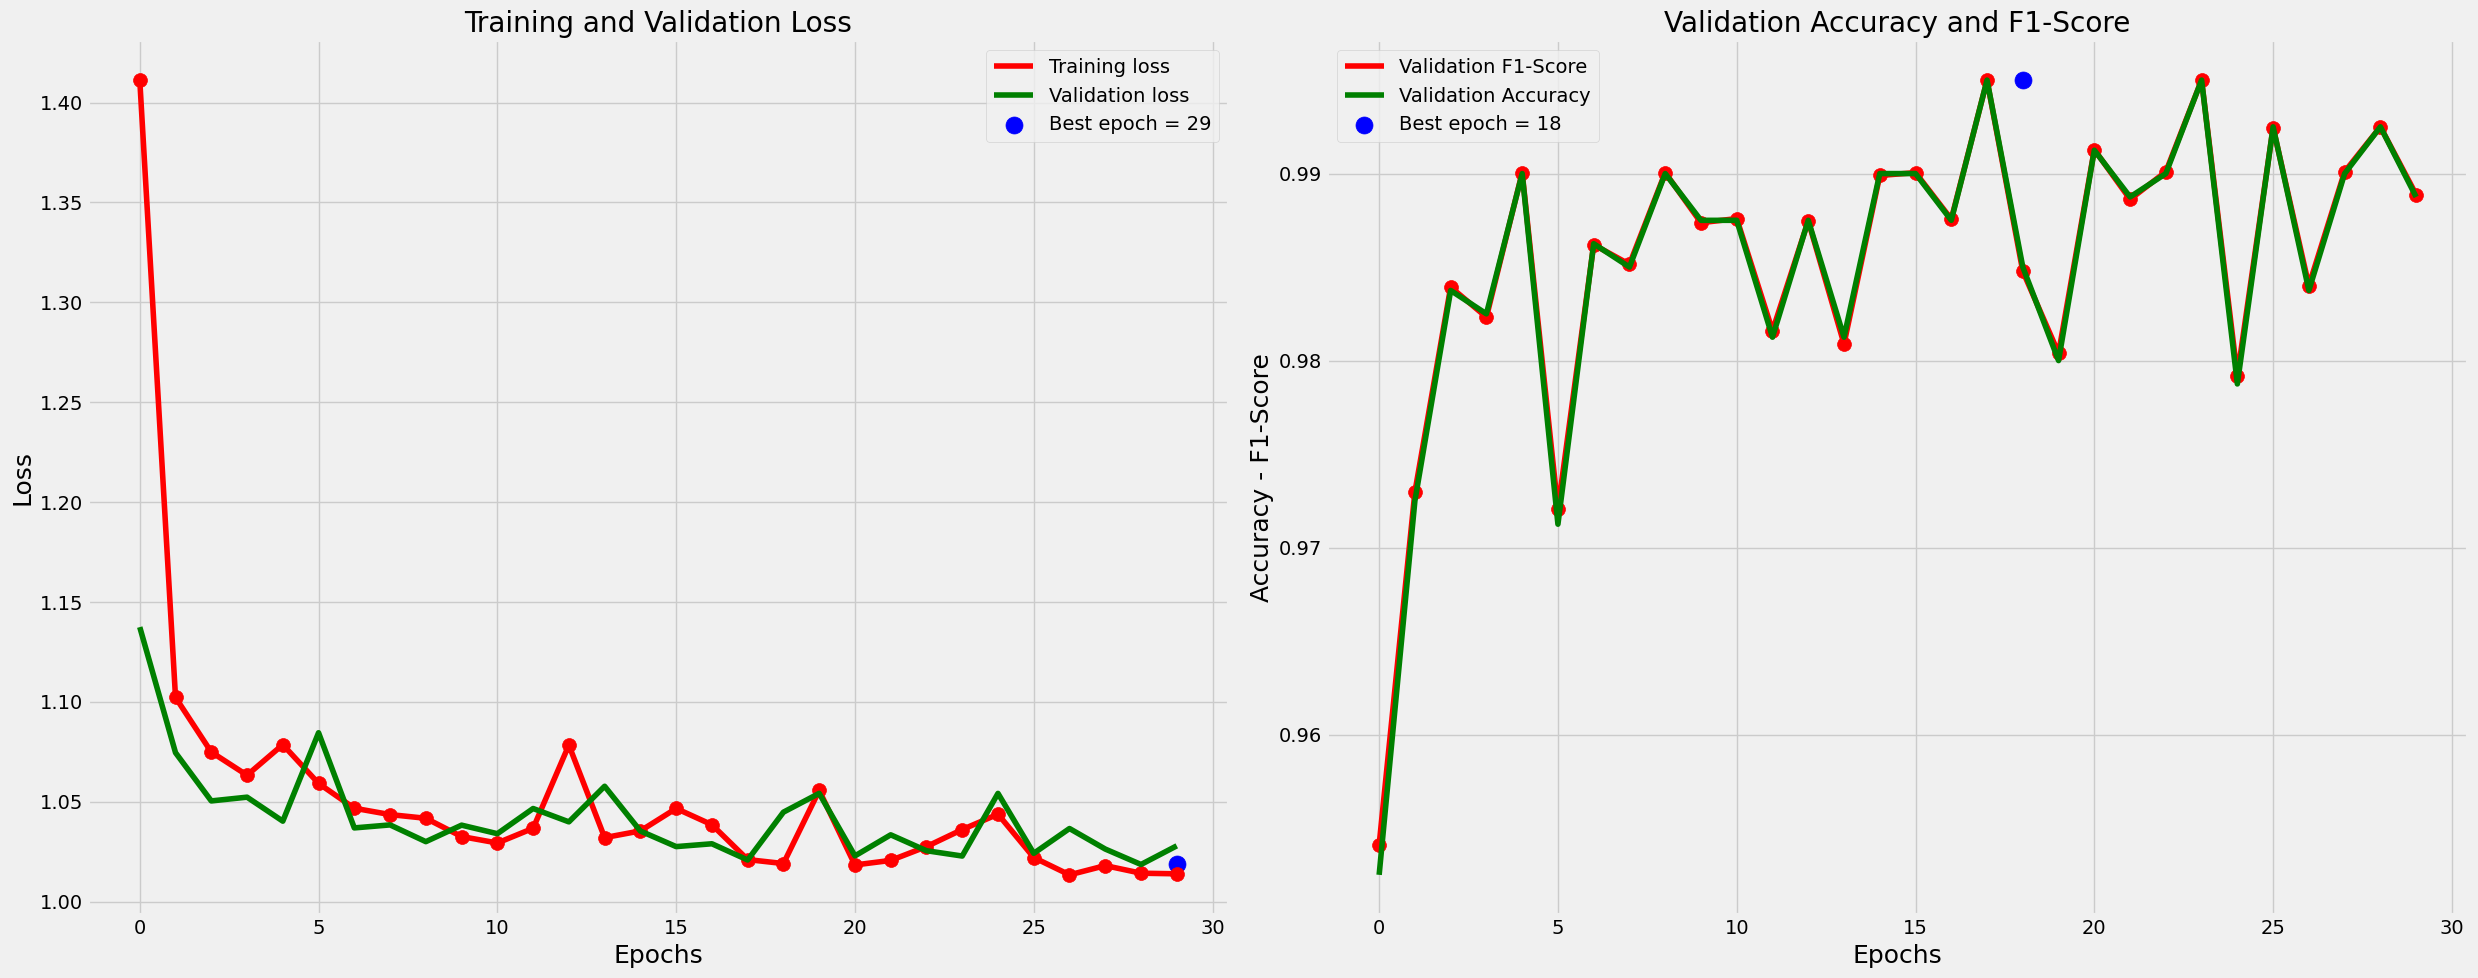

28

In [3]:
import utils
utils.plot_training_results(val_f1_scores,train_losses,val_accuracies,val_losses)

In [4]:
num_epochs = 20
class_weights = torch.tensor([1.0, 1.2]).to(config.DEVICE)
criterion = F1ScoreCrossEntropyLoss(weight=class_weights)
# criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=0.0003,weight_decay=config.WEIGHT_DECAY)
train_loader , val_loader , test_loader = data_loader.create_dataloader(None,None,None)
train_losses,val_losses,val_accuracies,val_f1_scores = fit(model,criterion,optimizer,train_loader,val_loader,test_loader,num_epochs=num_epochs,log_file=config.LOGFILE,save_dir='log/')  

100%|██████████| 38/38 [00:01<00:00, 21.64it/s]


Epoch 1 | train_loss: 1.100 | val_loss: 1.078 | val_acc: 0.978 | f1_score: 0.967


100%|██████████| 38/38 [00:01<00:00, 19.93it/s]


Epoch 2 | train_loss: 1.064 | val_loss: 1.082 | val_acc: 0.975 | f1_score: 0.963


100%|██████████| 38/38 [00:01<00:00, 19.49it/s]


Epoch 3 | train_loss: 1.087 | val_loss: 1.075 | val_acc: 0.977 | f1_score: 0.965


100%|██████████| 38/38 [00:01<00:00, 20.12it/s]


Epoch 4 | train_loss: 1.083 | val_loss: 1.083 | val_acc: 0.975 | f1_score: 0.962


100%|██████████| 38/38 [00:01<00:00, 20.57it/s]


Epoch 5 | train_loss: 1.054 | val_loss: 1.083 | val_acc: 0.975 | f1_score: 0.962


100%|██████████| 38/38 [00:01<00:00, 19.83it/s]


Epoch 6 | train_loss: 1.081 | val_loss: 1.078 | val_acc: 0.977 | f1_score: 0.965


100%|██████████| 38/38 [00:01<00:00, 19.11it/s]


Epoch 7 | train_loss: 1.078 | val_loss: 1.084 | val_acc: 0.975 | f1_score: 0.962


100%|██████████| 38/38 [00:01<00:00, 22.65it/s]


Epoch 8 | train_loss: 1.070 | val_loss: 1.077 | val_acc: 0.978 | f1_score: 0.967


100%|██████████| 38/38 [00:01<00:00, 21.44it/s]


Epoch 9 | train_loss: 1.076 | val_loss: 1.076 | val_acc: 0.978 | f1_score: 0.967


100%|██████████| 38/38 [00:01<00:00, 23.20it/s]


Epoch 10 | train_loss: 1.041 | val_loss: 1.077 | val_acc: 0.978 | f1_score: 0.968


100%|██████████| 38/38 [00:01<00:00, 21.54it/s]


Epoch 11 | train_loss: 1.072 | val_loss: 1.072 | val_acc: 0.978 | f1_score: 0.968


100%|██████████| 38/38 [00:01<00:00, 21.65it/s]


Epoch 12 | train_loss: 1.038 | val_loss: 1.072 | val_acc: 0.982 | f1_score: 0.973


100%|██████████| 38/38 [00:01<00:00, 21.91it/s]


Epoch 13 | train_loss: 1.041 | val_loss: 1.075 | val_acc: 0.980 | f1_score: 0.970


100%|██████████| 38/38 [00:01<00:00, 19.83it/s]


Epoch 14 | train_loss: 1.070 | val_loss: 1.076 | val_acc: 0.980 | f1_score: 0.970


100%|██████████| 38/38 [00:01<00:00, 21.38it/s]


Epoch 15 | train_loss: 1.059 | val_loss: 1.085 | val_acc: 0.977 | f1_score: 0.965


100%|██████████| 38/38 [00:01<00:00, 21.43it/s]


Epoch 16 | train_loss: 1.067 | val_loss: 1.085 | val_acc: 0.977 | f1_score: 0.965


100%|██████████| 38/38 [00:01<00:00, 22.32it/s]


Epoch 17 | train_loss: 1.093 | val_loss: 1.083 | val_acc: 0.980 | f1_score: 0.970


100%|██████████| 38/38 [00:01<00:00, 22.22it/s]


Epoch 18 | train_loss: 1.032 | val_loss: 1.071 | val_acc: 0.982 | f1_score: 0.973


100%|██████████| 38/38 [00:01<00:00, 21.33it/s]


Epoch 19 | train_loss: 1.034 | val_loss: 1.071 | val_acc: 0.985 | f1_score: 0.977


100%|██████████| 38/38 [00:01<00:00, 21.31it/s]


Epoch 20 | train_loss: 1.042 | val_loss: 1.074 | val_acc: 0.980 | f1_score: 0.970


100%|██████████| 38/38 [00:01<00:00, 19.55it/s]

test_loss: 1.114 | test_acc: 0.978 | f1_score: 0.967
Training completed!


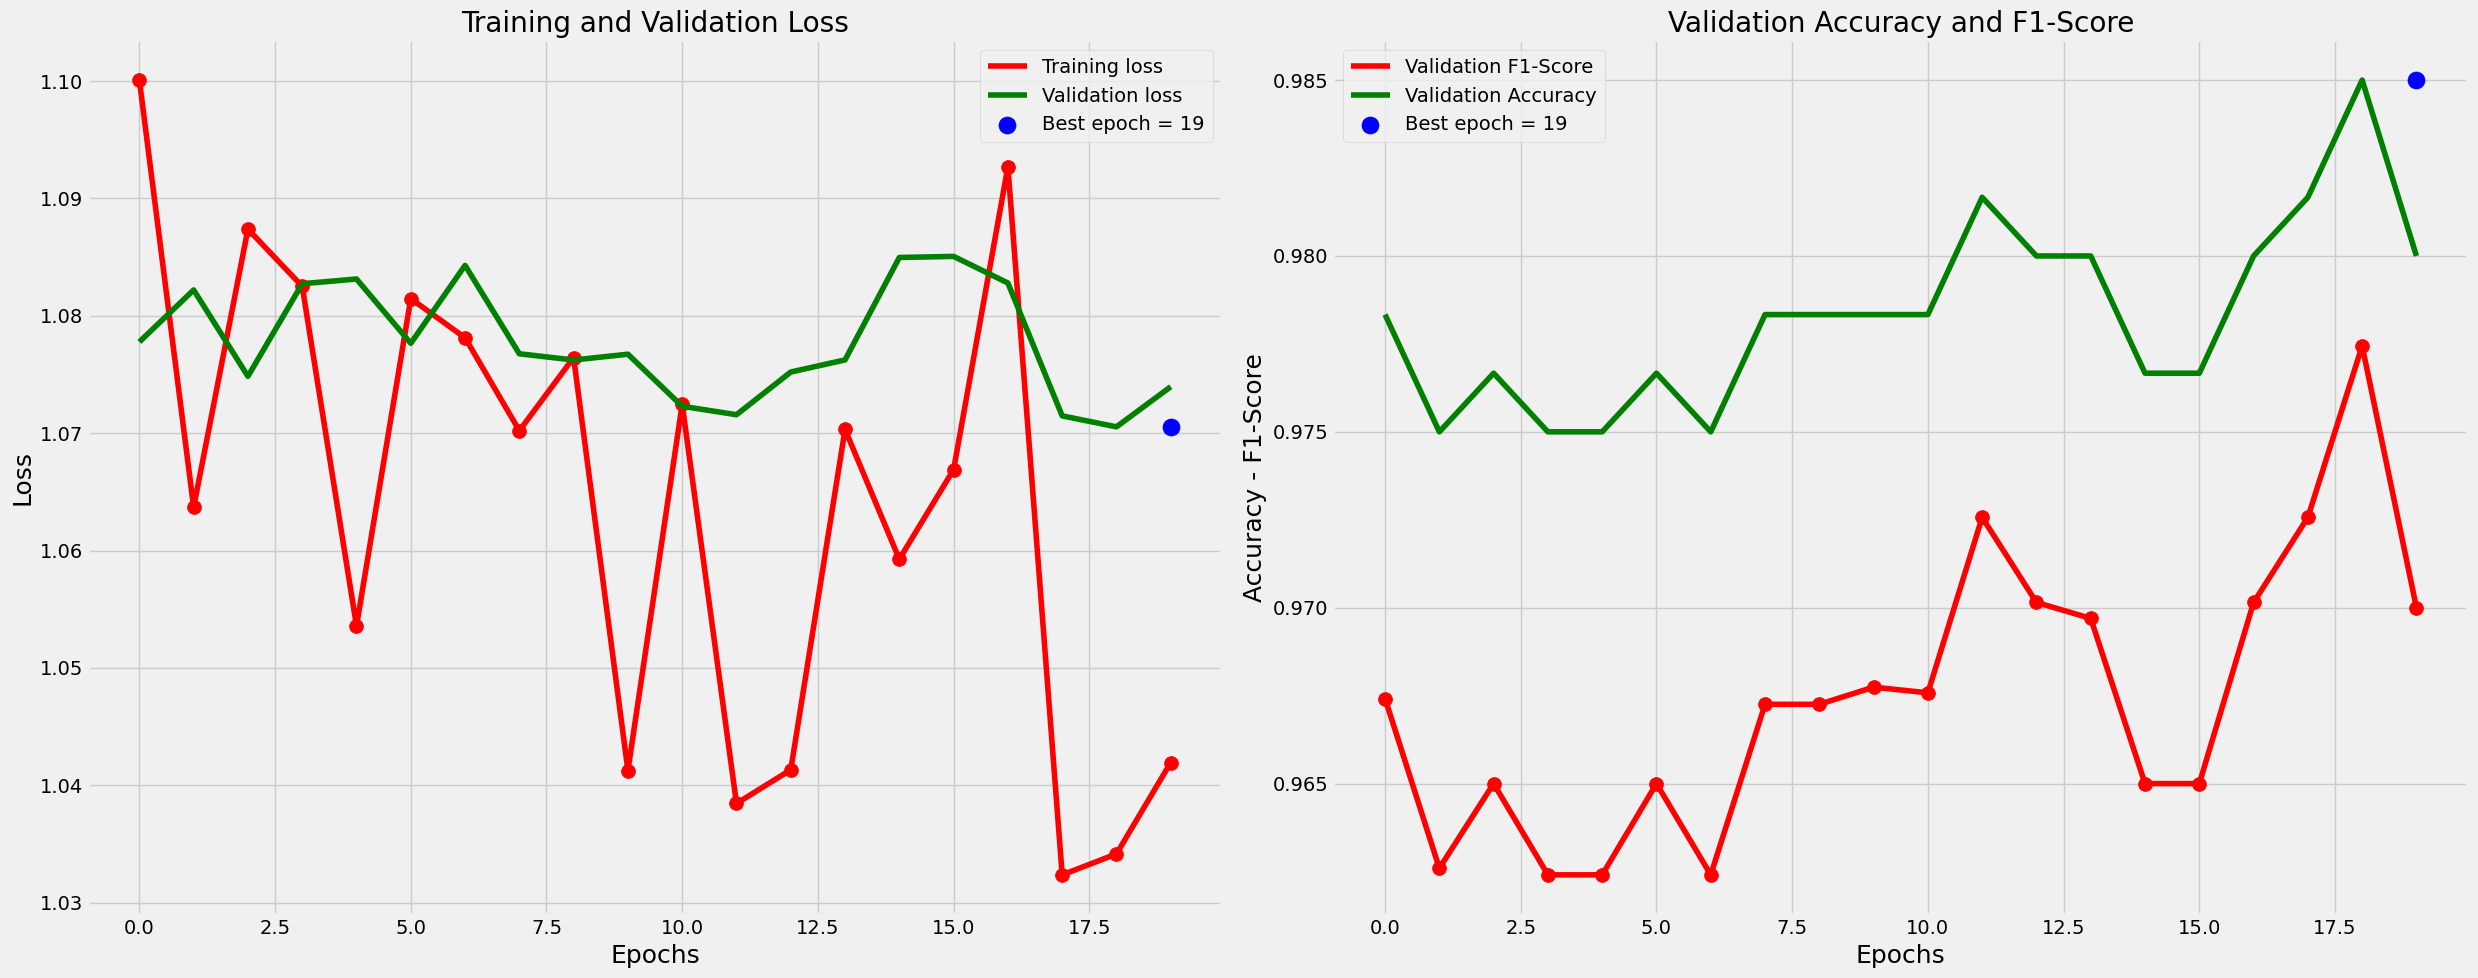

18

In [5]:
import utils
utils.plot_training_results(val_f1_scores,train_losses,val_accuracies,val_losses)

In [4]:
def predict_and_gather_uncorrected(model, data_loader):
    """
    Predict batches of data using the given model and gather incorrect predictions.

    Args:
        model (torch.nn.Module): The trained model.
        data_loader (torch.utils.data.DataLoader): The data loader containing the data to predict.
        config.DEVICE (str): The device to use for inference ('cuda' for GPU or 'cpu').

    Returns:
        list of tuples: A list containing tuples (image, true_label, predicted_label) for incorrect predictions.
    """
    model.eval()
    uncorrected_list = []

    with torch.no_grad():
        for images, true_labels in data_loader:
            images = images.to(config.DEVICE)
            true_labels = true_labels.to(config.DEVICE)

            outputs = model(images)
            _, predicted_labels = torch.max(outputs, 1)

            incorrect_mask = predicted_labels != true_labels
            for idx in range(len(images)):
                if incorrect_mask[idx]:
                    image = images[idx].cpu()  # Move the image to CPU for visualization if needed
                    true_label = true_labels[idx].item()
                    predicted_label = predicted_labels[idx].item()
                    uncorrected_list.append((image, true_label, predicted_label))

    return uncorrected_list

# Example usage:
# Assuming you have a trained model 'model', a data loader 'data_loader', and the config.DEVICE to use 'config.DEVICE' (e.g., 'cuda' or 'cpu').
uncorrected_list = predict_and_gather_uncorrected(model, test_loader)
print(len(uncorrected_list))

7


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


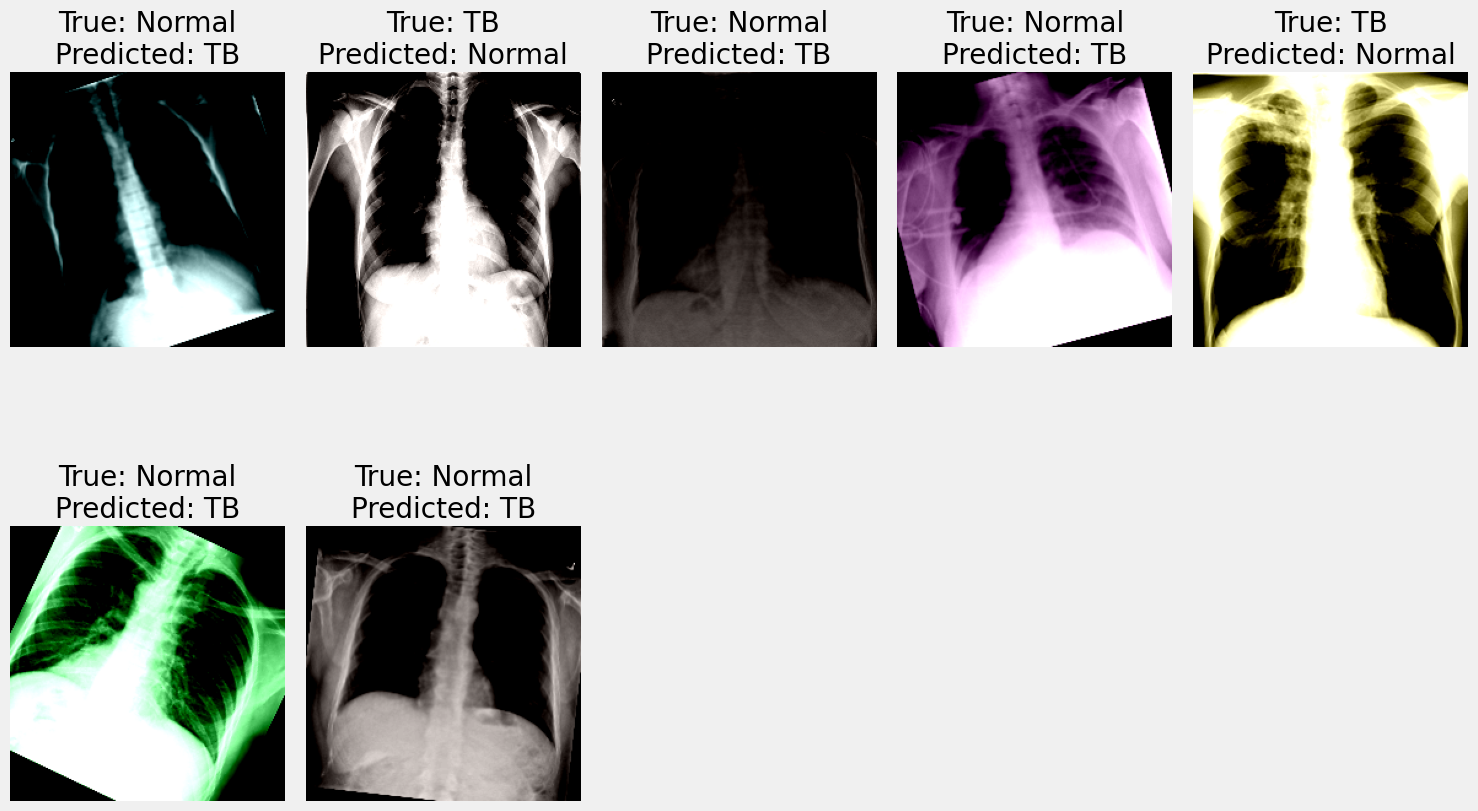

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def plot_incorrect_predictions(uncorrected_list, class_labels):
    """
    Plot the images with their correct and predicted labels for incorrect predictions.

    Args:
        uncorrected_list (list of tuples): List containing tuples (image, true_label, predicted_label)
                                          for incorrect predictions.
        class_labels (dict): Dictionary mapping class indices to class labels.
    """
    num_images = len(uncorrected_list)
    num_rows = (num_images - 1) // 5 + 1
    num_cols = min(num_images, 5)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    for idx, (image, true_label, predicted_label) in enumerate(uncorrected_list):
        true_label = class_labels[true_label]
        predicted_label = class_labels[predicted_label]

        row_idx = idx // 5
        col_idx = idx % 5

        axes[row_idx, col_idx].imshow(image.permute(1, 2, 0))  # Move channels to the last dimension for visualization
        axes[row_idx, col_idx].axis('off')

        axes[row_idx, col_idx].set_title(f'True: {true_label}\nPredicted: {predicted_label}')

    for idx in range(num_images, num_rows * 5):
        row_idx = idx // 5
        col_idx = idx % 5
        fig.delaxes(axes[row_idx, col_idx])

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming you have 'uncorrected_list' as a list of tuples (image, true_label, predicted_label) from the previous function.
class_labels = {0: 'Normal', 1: 'TB'}  # Replace this with your actual class labels
plot_incorrect_predictions(uncorrected_list, class_labels)


In [19]:
import torch
import torchvision.transforms as transforms
from PIL import Image

def get_mean_std(data_df):
    """
    Calculate the mean and standard deviation of a list of RGB images specified in the DataFrame.

    Args:
        data_df (pd.DataFrame): The DataFrame containing 'filepaths' and 'labels' columns.

    Returns:
        tuple: A tuple containing the mean and standard deviation of the images as (mean, std).
    """
    transform = transforms.Compose([
        transforms.Lambda(lambda x: x.convert('RGB')),
        transforms.Resize((224, 224)),  # Resize images to a common size (optional)
        transforms.ToTensor()  # Convert images to PyTorch tensors
    ])

    images_list = []
    for filepath in tqdm(data_df['filepaths']):
        image = Image.open(filepath)
        image = transform(image)
        images_list.append(image)

    # Convert the list of images to a PyTorch tensor
    images_tensor = torch.stack(images_list)

    # Calculate the mean and standard deviation along each channel (R, G, and B)
    mean = torch.mean(images_tensor, dim=(0, 2, 3))
    std = torch.std(images_tensor, dim=(0, 2, 3))

    return mean, std

# Example usage:
# Assuming you have a DataFrame 'data_df' containing 'filepaths' and 'labels'.
# mean, std = calculate_mean_and_std_from_dataframe(data_df)
# print("Mean:", mean)
# print("Std:", std)
mean , std = get_mean_std(concatenated_df)

100%|██████████| 4200/4200 [00:39<00:00, 105.93it/s]


In [20]:
mean , std

(tensor([0.5013, 0.5097, 0.5125]), tensor([0.2587, 0.2588, 0.2601]))